# Netflix Data : Cleaning Analysis and Visualization

### Step 1:  Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

### Step 2: Loading and Reading the Dataset

In [2]:
data=pd.read_csv('C:/Users/DELL/Desktop/netflix12.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.0,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8789,s8798,TV Show,Yunus Emre,Not Given,United States,9/13/2018,2016.0,TV-Y7,NaN,Kids' TV
8790,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8791,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8792,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016.0,TV-Y,1 Season,Kids' TV


### Fetching the first 10 Rows from the Dataset

In [3]:
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.0,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021.0,PG-13,104 min,"Comedies, Dramas"
7,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021.0,PG-13,104 min,"Comedies, Dramas"
8,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019.0,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
9,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021.0,TV-MA,127 min,"Dramas, International Movies"


In [4]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

## Step 3: Data Preprocessing

### Informative Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8794 non-null   object 
 1   type          8790 non-null   object 
 2   title         8789 non-null   object 
 3   director      8790 non-null   object 
 4   country       8782 non-null   object 
 5   date_added    8792 non-null   object 
 6   release_year  8792 non-null   float64
 7   rating        8792 non-null   object 
 8   duration      8793 non-null   object 
 9   listed_in     8794 non-null   object 
dtypes: float64(1), object(9)
memory usage: 687.2+ KB


### Checking for a Null Value in a  Dataset

In [6]:
data.isnull().sum()

show_id          0
type             4
title            5
director         4
country         12
date_added       2
release_year     2
rating           2
duration         1
listed_in        0
dtype: int64

### Removing Null Values from Dataset

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Checking for a Duplicate row in a Dataset

In [9]:
data.duplicated().sum()

4

### Removing  Duplicate row from Dataset

In [10]:
data=data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

### Convert the Data type of 'Date_added' Column to Date_time

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 8792
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8761 non-null   object 
 1   type          8761 non-null   object 
 2   title         8761 non-null   object 
 3   director      8761 non-null   object 
 4   country       8761 non-null   object 
 5   date_added    8761 non-null   object 
 6   release_year  8761 non-null   float64
 7   rating        8761 non-null   object 
 8   duration      8761 non-null   object 
 9   listed_in     8761 non-null   object 
dtypes: float64(1), object(9)
memory usage: 752.9+ KB


In [13]:
data['date_added ']= pd.to_datetime(data['date_added'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 8792
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8761 non-null   object        
 1   type          8761 non-null   object        
 2   title         8761 non-null   object        
 3   director      8761 non-null   object        
 4   country       8761 non-null   object        
 5   date_added    8761 non-null   object        
 6   release_year  8761 non-null   float64       
 7   rating        8761 non-null   object        
 8   duration      8761 non-null   object        
 9   listed_in     8761 non-null   object        
 10  date_added    8761 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 821.3+ KB


### Extract Year and Month from 'date_added' Column

In [15]:
data=data.drop(['date_added'],axis=1)
data

,show_id,type,title,director,country,release_year,rating,duration,listed_in,date_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020.0,PG-13,90 min,Documentaries,2021-09-25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021-09-24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies",2021-09-22
4,s8,Movie,Sankofa,Haile Gerima,United States,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021-09-24
...,...,...,...,...,...,...,...,...,...,...
8786,s8785,Movie,Yoko and His Friends,Not Given,Russia,2015.0,TV-Y,78 min,Children & Family Movies,2018-06-23
8787,s8796,TV Show,Yu-Gi-Oh! Arc-V,Not Given,Japan,2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",2018-05-01
8788,s8797,TV Show,Yunus Emre,Not Given,Turkey,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017-01-17
8790,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016-12-15


In [16]:
data['year_added']= data['date_added '].dt.year
data['month_added']=data['date_added '].dt.month

### Removing the Columns from Dataset which is of no use

In [17]:
data=data.drop(['show_id'],axis=1)
data

,type,title,director,country,release_year,rating,duration,listed_in,date_added,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020.0,PG-13,90 min,Documentaries,2021-09-25,2021,9
1,TV Show,Ganglands,Julien Leclercq,France,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021,9
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021-09-24,2021,9
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies",2021-09-22,2021,9
4,Movie,Sankofa,Haile Gerima,United States,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021-09-24,2021,9
...,...,...,...,...,...,...,...,...,...,...,...
8786,Movie,Yoko and His Friends,Not Given,Russia,2015.0,TV-Y,78 min,Children & Family Movies,2018-06-23,2018,6
8787,TV Show,Yu-Gi-Oh! Arc-V,Not Given,Japan,2015.0,TV-Y7,2 Seasons,"Anime Series, Kids' TV",2018-05-01,2018,5
8788,TV Show,Yunus Emre,Not Given,Turkey,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017-01-17,2017,1
8790,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016-12-15,2016,12


## Step 4: Exploratory Data Analysis (EDA)

### Content Distribution on Netflix

In [18]:
type_count= data['type'].value_counts()

In [19]:
type_count

type
Movie      6121
TV Show    2640
Name: count, dtype: int64

### Plot the Distribution

Text(0.5, 0.98, 'Total Content on Netflix')

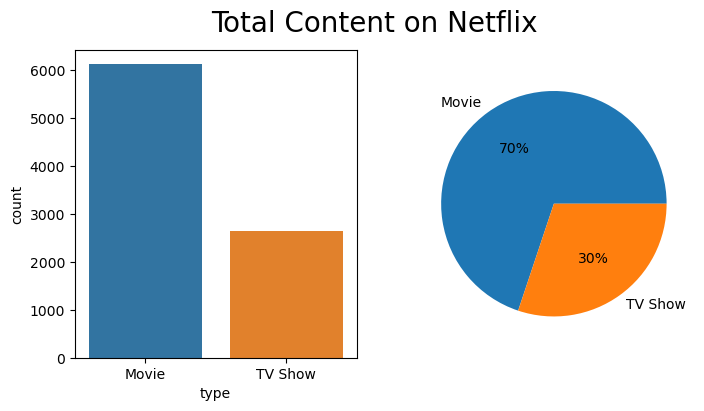

In [20]:
fig, axes =plt.subplots(1,2,figsize=(8,4))
sns.countplot(data=data,x=data['type'],ax=axes[0])
plt.pie(type_count,labels=['Movie','TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix',fontsize=20)

### Top 10 Countries with  most Content on Netflix

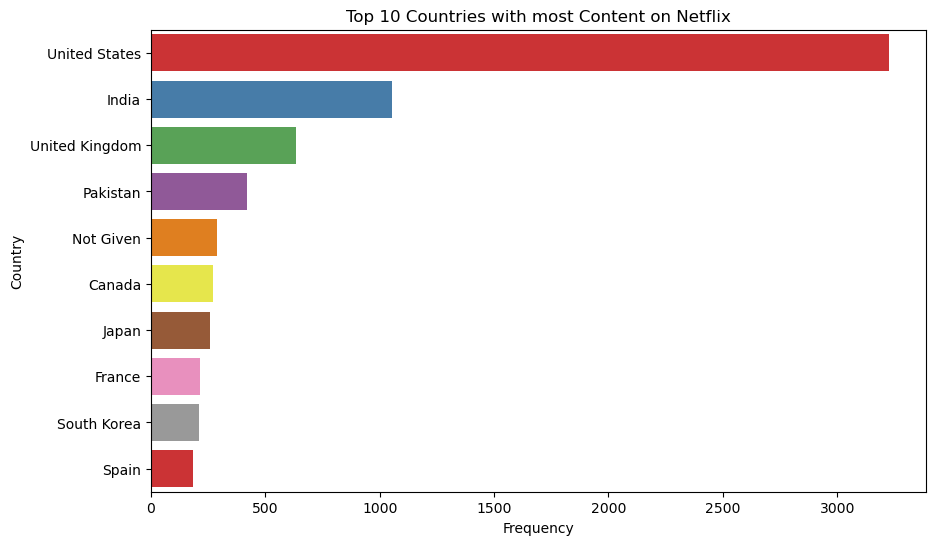

In [21]:
plt.figure(figsize=(10,6))
top_countries= data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y= top_countries.index ,palette='Set1')
plt.title('Top 10 Countries with most Content on Netflix')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

## Top 10 Genres on Netflix

### Spliting the 'listed_in' Column into Multiple Genres

In [22]:
data['genres']= data['listed_in'].str.split(', ')

### Explode the Genres into individual rows

In [23]:
genres_exploded= data.explode('genres')

### Plotting the Top 10 Genres

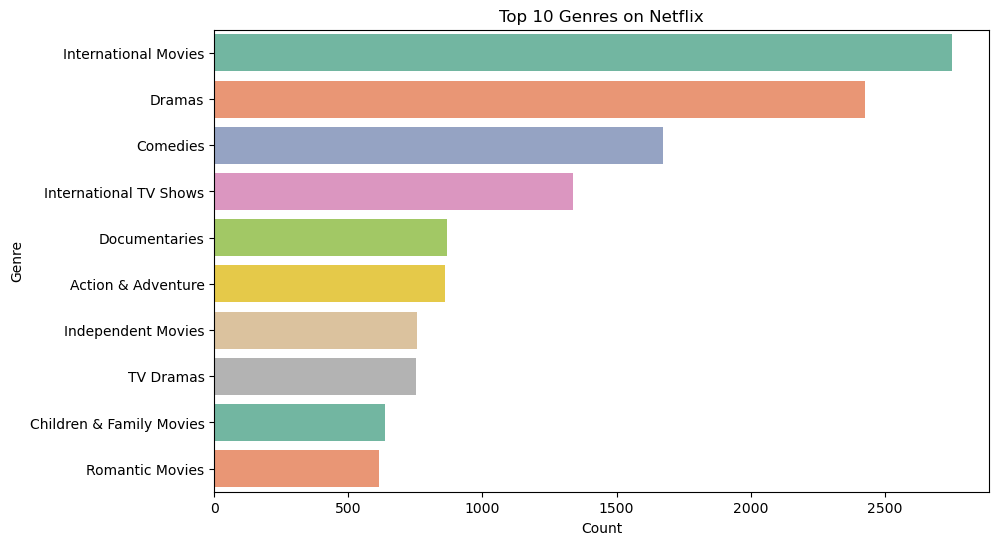

In [24]:
plt.figure(figsize=(10,6))
top_genres= genres_exploded['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index,palette='Set2')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Rating on Netflix

In [25]:
ratings= data['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)

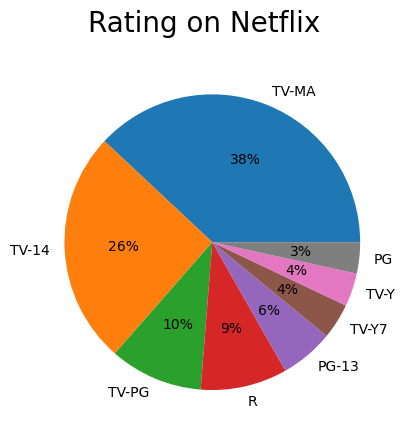

<Figure size 1000x600 with 0 Axes>

In [26]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Rating on Netflix',fontsize=20)
plt.figure(figsize=(10,6))
plt.show()

### Top 9 Directors with most Titles

In [27]:
top_directors=data['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:10]
top_directors

,director,count
1,Rajiv Chilaka,20
2,"Raúl Campos, Jan Suter",18
3,Alastair Fothergill,18
4,Marcus Raboy,16
5,Suhas Kadav,15
6,Jay Karas,14
7,Cathy Garcia-Molina,13
9,Jay Chapman,12
10,Youssef Chahine,12


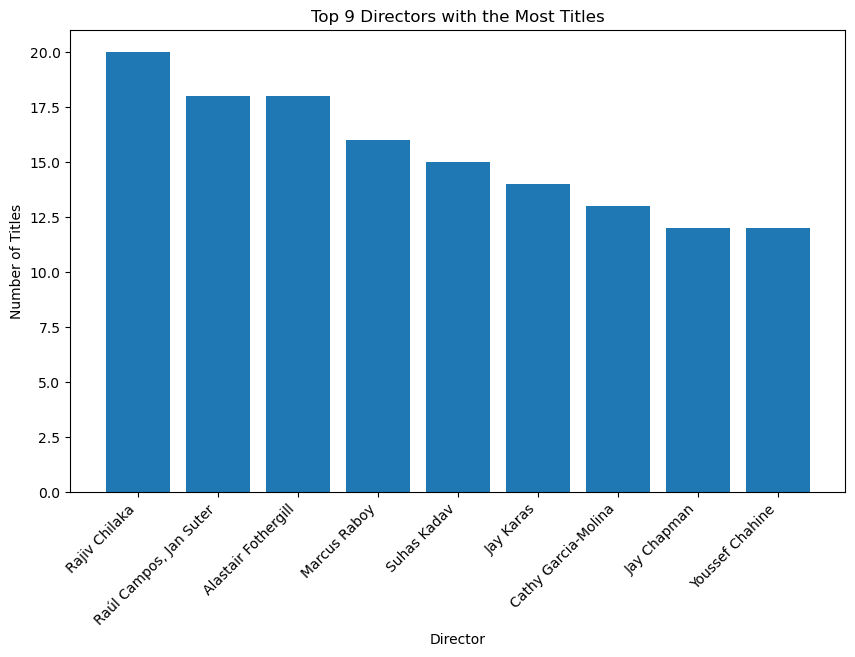

In [28]:
plt.figure(figsize=(10,6))
plt.bar(top_directors['director'],top_directors['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 9 Directors with the Most Titles')
plt.show()

### Monthly Releases of Movies and TV Shows on Netflix

In [29]:
monthly_movie_release = data[data['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_series_release= data[data['type']=='TV Show']['month_added'].value_counts().sort_index()

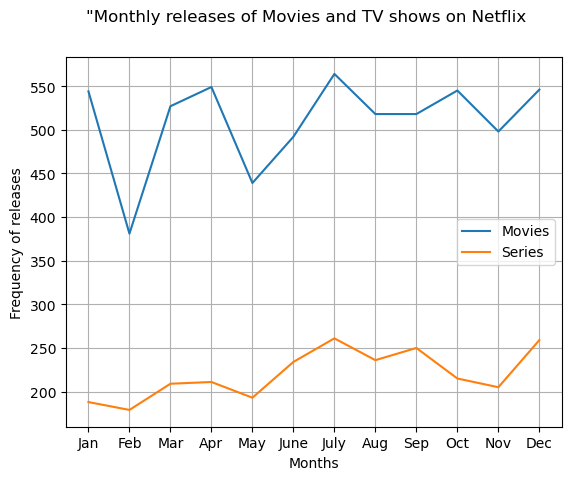

In [30]:
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle('"Monthly releases of Movies and TV shows on Netflix')
plt.show()

### Yearly Releases of Movies and TV Shows on Netflix

In [31]:
yearly_movie_release= data[data['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_release=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

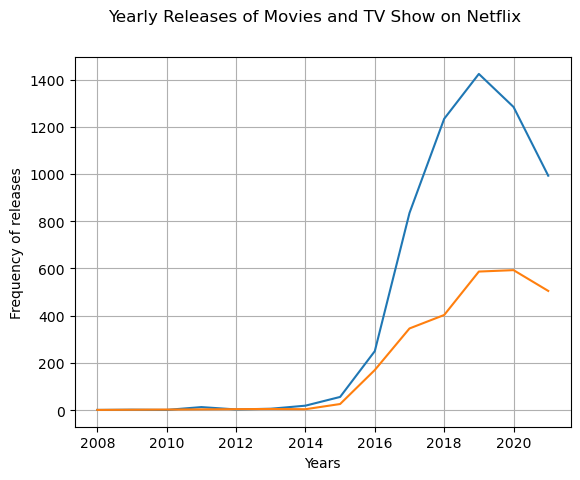

In [32]:
plt.plot(yearly_movie_release.index,yearly_movie_release.values,label='Movies')
plt.plot(yearly_series_release.index,yearly_series_release.values,label='Series')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.grid(True)
plt.suptitle('Yearly Releases of Movies and TV Show on Netflix')
plt.show()

### Distribution of Years in the first 100 Releases

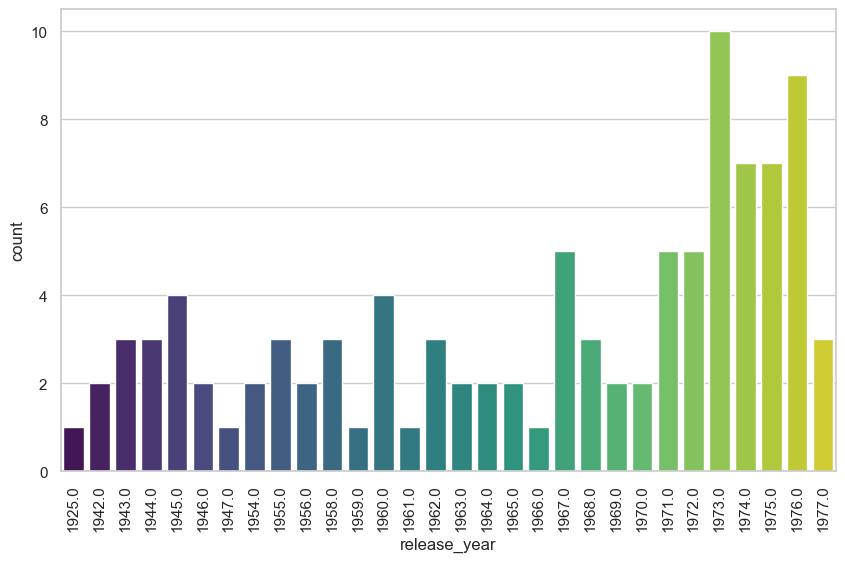

In [33]:
df_temp= data['release_year'].sort_values().head(100)
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x=df_temp,palette='viridis')
plt.xticks(rotation=90)
plt.show()

## Content Added over the Years

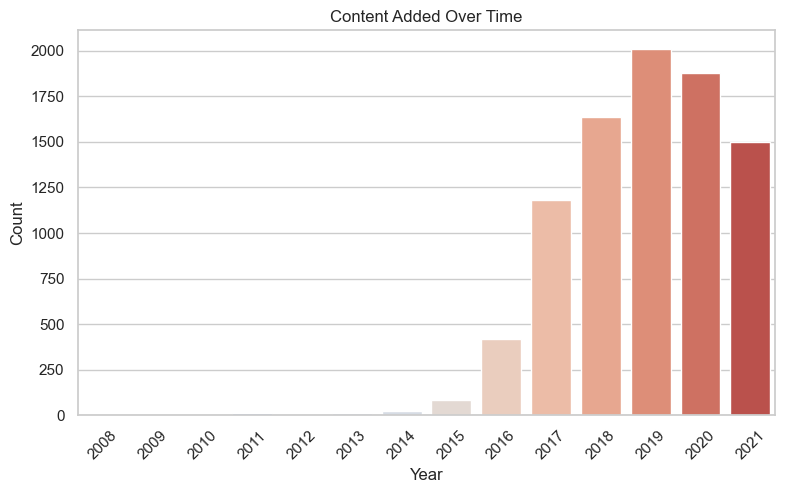

In [34]:
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='year_added',palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Issuance release_year

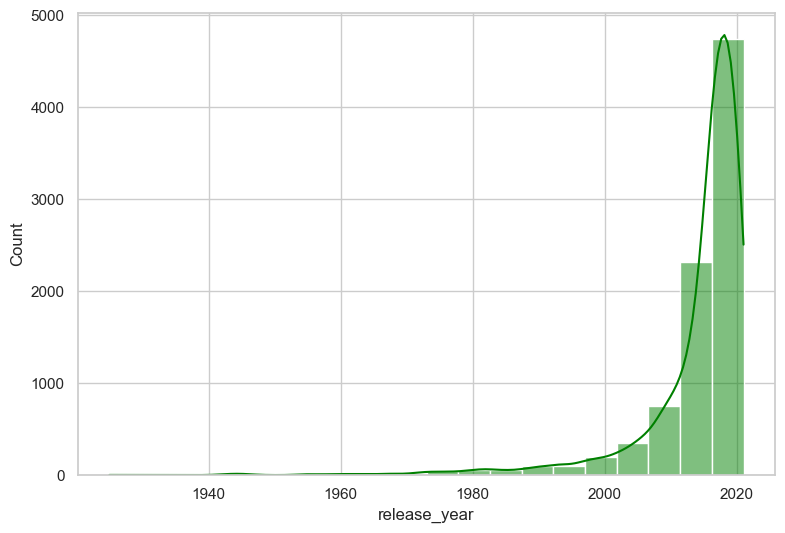

In [35]:
plt.figure(figsize=(9,6))
sns.histplot(data=data,x='release_year',bins=20,kde=True ,color='green')
plt.show()

## Correlation_matrix

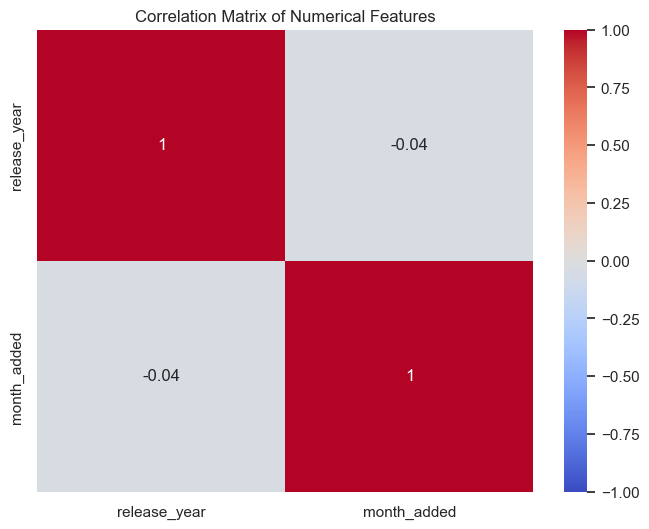

In [36]:
correlation_matrix= data[['release_year','month_added']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True , cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Word Cloud on the basis of Movie Titles

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud

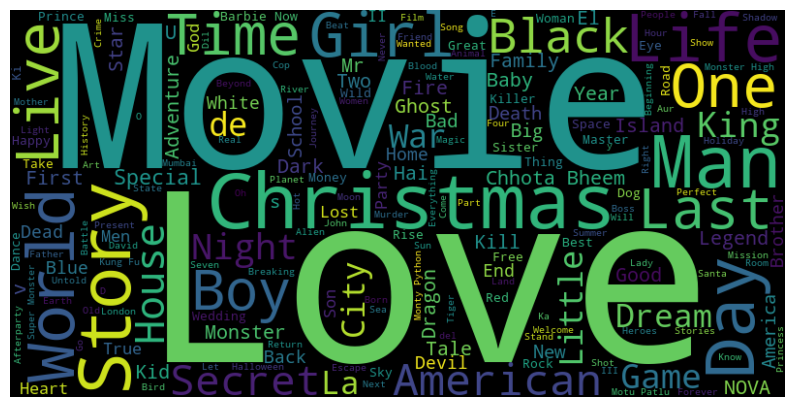

In [39]:
movie_titles= data[data['type']=='Movie']['title']
wordcloud1= WordCloud(width=800 , height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud on the basis of TV Show

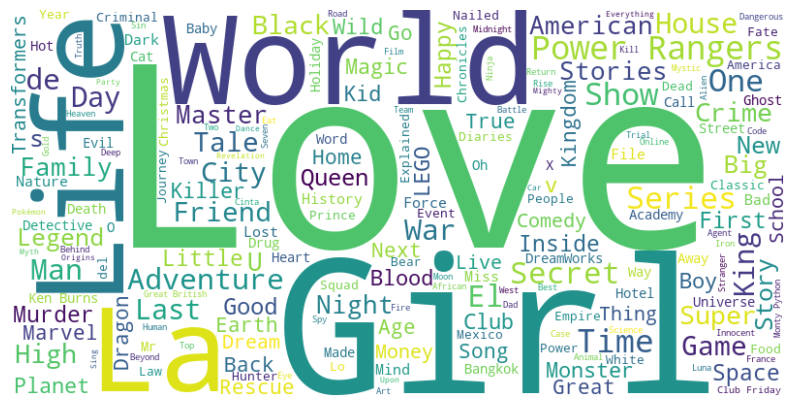

In [40]:
tv_show= data[data['type']=='TV Show']['title']
wordcloud2= WordCloud(width=800,height=400,background_color='white').generate(' '.join(tv_show))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.show()